# CNN in TensorFlow & Keras

# Importing libraries & Loading the CIFAR-10 Dataset:

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [5]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 92s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


# Display Sample Images from the Dataset:

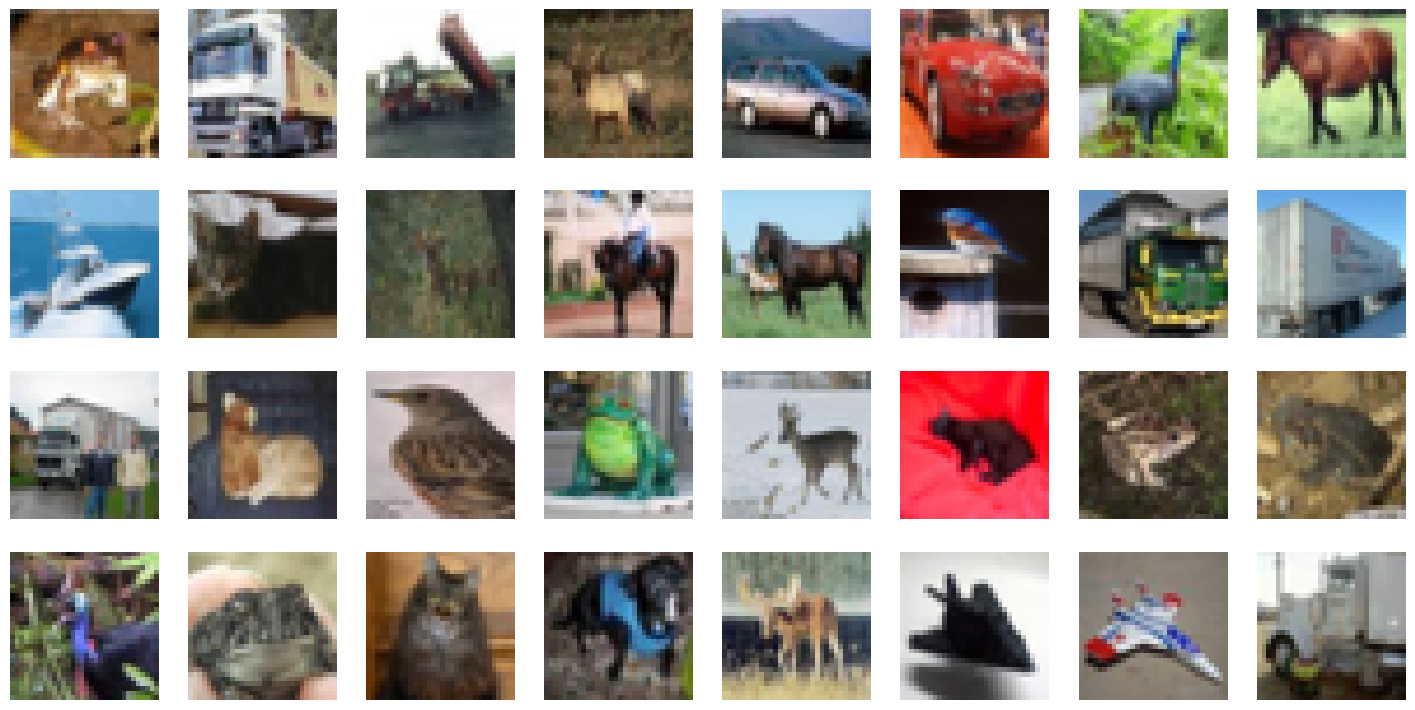

In [7]:
plt.figure(figsize=(18, 9))
 
num_rows = 4
num_cols = 8
 
# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

# Dataset Preprocessing:

In [8]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
 
# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])
 
# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
 
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Dataset and Training Configuration Parameters:

In [9]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3
     
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

# Define the Convolutional Blocks for the CNN:

In [10]:
def cnn_model(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
     
    return model

# Create the Model:

In [11]:
# Create the model.
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

# Cmpile the Model:

In [12]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )


# Train the Model:

In [13]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS, 
                    verbose=1, 
                    validation_split=.3,
                   )


Epoch 1/31
137/137 [==============================] - 67s 484ms/step - loss: 2.1199 - accuracy: 0.2274 - val_loss: 1.9531 - val_accuracy: 0.3261
Epoch 2/31
137/137 [==============================] - 66s 480ms/step - loss: 1.6751 - accuracy: 0.3939 - val_loss: 1.4807 - val_accuracy: 0.4739
Epoch 3/31
137/137 [==============================] - 72s 527ms/step - loss: 1.4311 - accuracy: 0.4795 - val_loss: 1.3896 - val_accuracy: 0.4884
Epoch 4/31
137/137 [==============================] - 74s 540ms/step - loss: 1.2583 - accuracy: 0.5503 - val_loss: 1.1507 - val_accuracy: 0.5893
Epoch 5/31
137/137 [==============================] - 73s 530ms/step - loss: 1.1187 - accuracy: 0.6016 - val_loss: 1.1463 - val_accuracy: 0.5935
Epoch 6/31
137/137 [==============================] - 72s 523ms/step - loss: 0.9941 - accuracy: 0.6471 - val_loss: 1.0306 - val_accuracy: 0.6374
Epoch 7/31
137/137 [==============================] - 68s 495ms/step - loss: 0.8835 - accuracy: 0.6877 - val_loss: 0.9351 - val_ac

# Plot the Training Results:

In [14]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

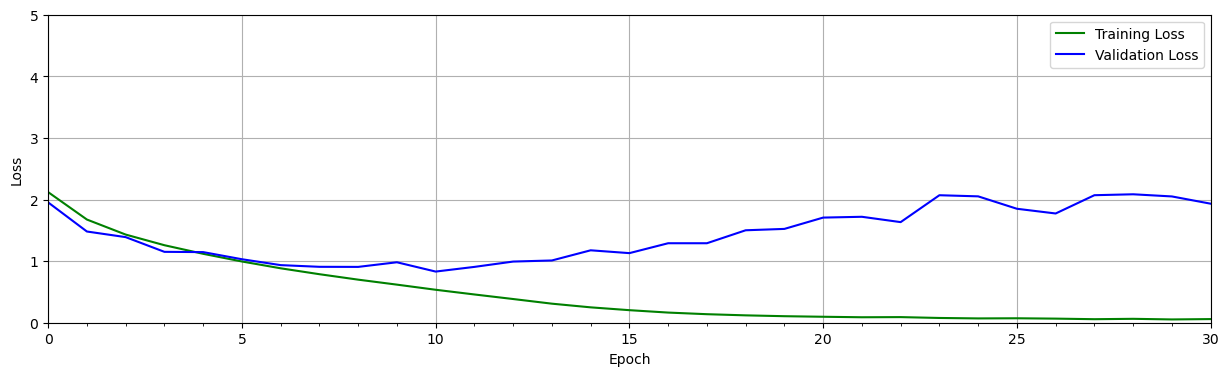

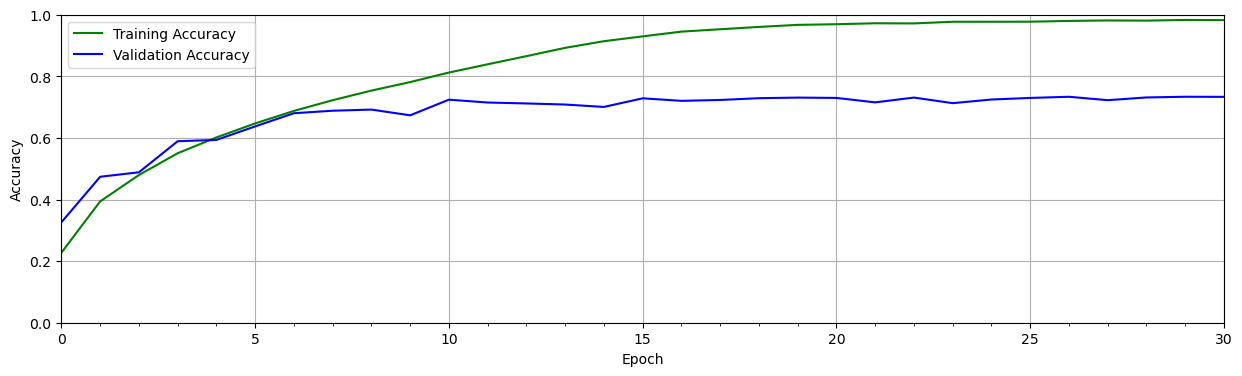

In [15]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# Define the Model (with Dropout):

In [16]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model


# Create the Model (with Dropout):

In [17]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

# Compile the Model (with Dropout):

In [18]:
model_dropout.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'],
                     )

# Train the Model (with Dropout):

In [19]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE, 
                            epochs=TrainingConfig.EPOCHS, 
                            verbose=1, 
                            validation_split=.3,
                           )

Epoch 1/31
137/137 [==============================] - 71s 517ms/step - loss: 2.0911 - accuracy: 0.2325 - val_loss: 1.9455 - val_accuracy: 0.3029
Epoch 2/31
137/137 [==============================] - 74s 543ms/step - loss: 1.7388 - accuracy: 0.3705 - val_loss: 1.5692 - val_accuracy: 0.4285
Epoch 3/31
137/137 [==============================] - 77s 566ms/step - loss: 1.5413 - accuracy: 0.4431 - val_loss: 1.3211 - val_accuracy: 0.5172
Epoch 4/31
137/137 [==============================] - 76s 554ms/step - loss: 1.3969 - accuracy: 0.5001 - val_loss: 1.3093 - val_accuracy: 0.5204
Epoch 5/31
137/137 [==============================] - 69s 505ms/step - loss: 1.2810 - accuracy: 0.5425 - val_loss: 1.2271 - val_accuracy: 0.5535
Epoch 6/31
137/137 [==============================] - 69s 504ms/step - loss: 1.1884 - accuracy: 0.5756 - val_loss: 1.0909 - val_accuracy: 0.6071
Epoch 7/31
137/137 [==============================] - 68s 498ms/step - loss: 1.0993 - accuracy: 0.6091 - val_loss: 1.0144 - val_ac

# Plot the Training Results:

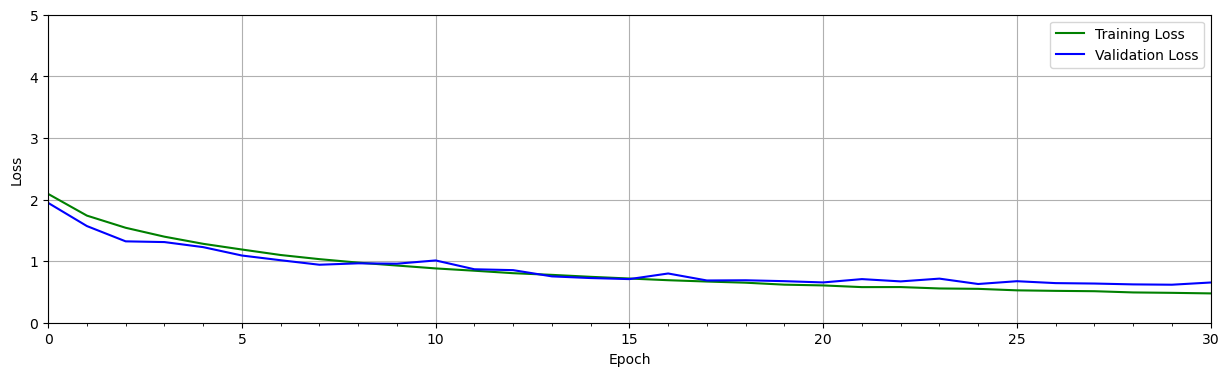

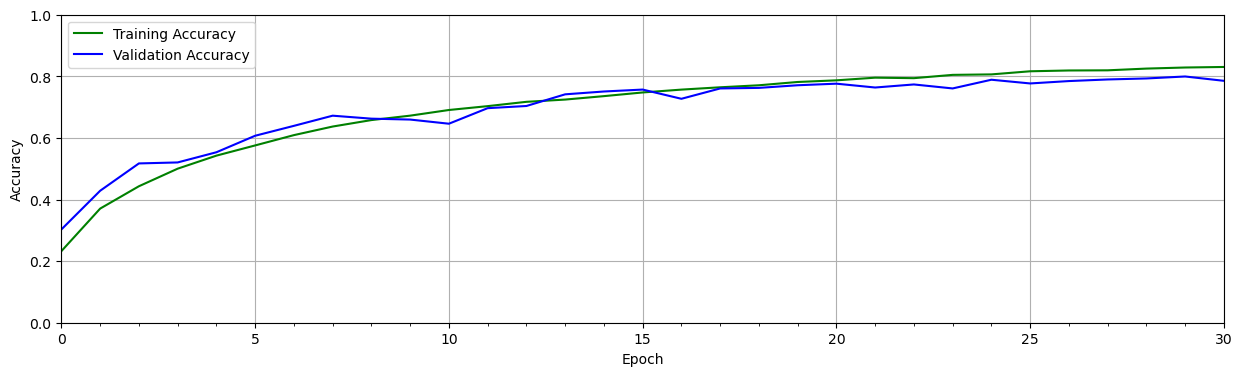

In [20]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
     
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# Saving and Loading Models:

In [21]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model_dropout.save('model_dropout')

INFO:tensorflow:Assets written to: model_dropout/assets


INFO:tensorflow:Assets written to: model_dropout/assets


# Loading Models:

In [22]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout')

# Evaluate the Model on the Test Dataset :

In [23]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 6s 20ms/step - loss: 0.6837 - accuracy: 0.7739
Test accuracy: 77.390


# Make Predictions on Sample Test Images:

In [24]:
def evaluate_model(dataset, model):
 
    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6
     
    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]
 
    # Get predictions from model.  
    predictions = model.predict(data_batch)
    plt.figure(figsize=(20, 8))
    num_matches = 0
         
    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])
        
        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])
             
        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})
             
        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')
            acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)
     
    return

1/1 [==============================] - 0s 77ms/step
Prediction accuracy:  0.87


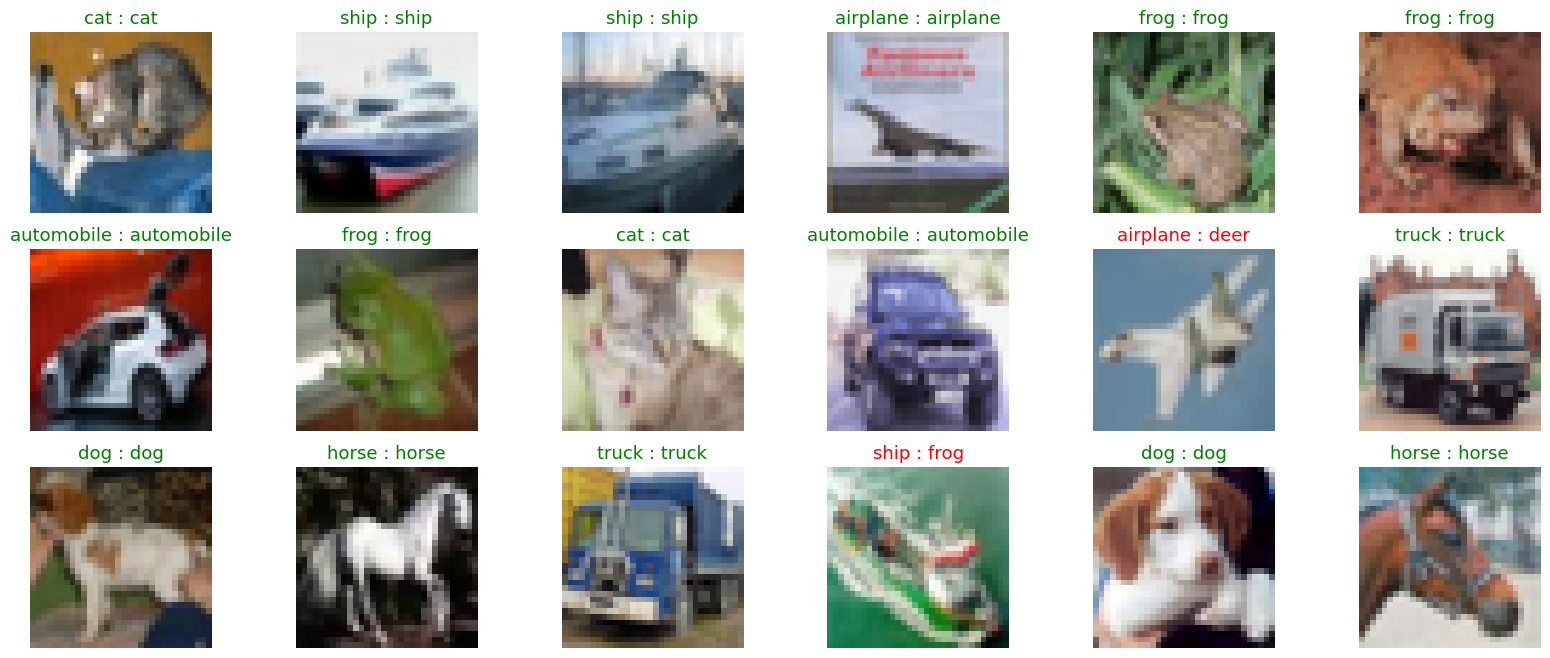

In [25]:
evaluate_model(X_test, reloaded_model_dropout)

# Q1:-(Weekend)

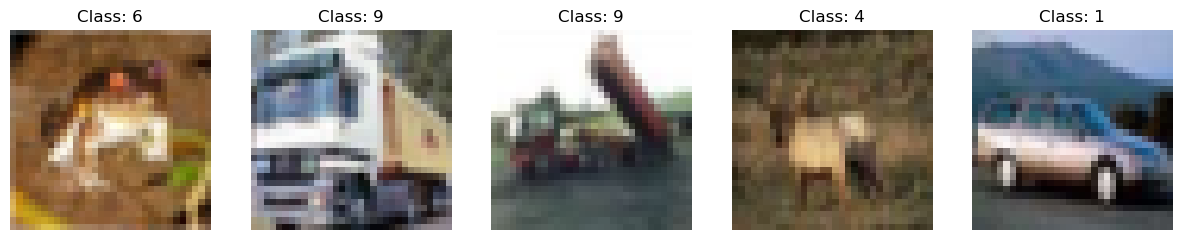

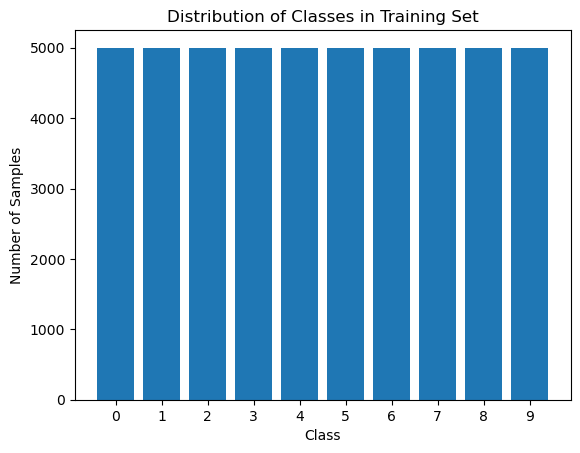

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5138 - accuracy: 0.4464 - val_loss: 1.2751 - val_accuracy: 0.5398
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1575 - accuracy: 0.5890 - val_loss: 1.0733 - val_accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0215 - accuracy: 0.6393 - val_loss: 1.0036 - val_accuracy: 0.6463
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9320 - accuracy: 0.6724 - val_loss: 0.9328 - val_accuracy: 0.6751
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8620 - accuracy: 0.6970 - val_loss: 0.9066 - val_accuracy: 0.6879
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8001 - accuracy: 0.7174 - val_loss: 0.8913 - val_accuracy: 0.6905
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7496 - accuracy: 0.7363 - val_loss: 0.8729 -

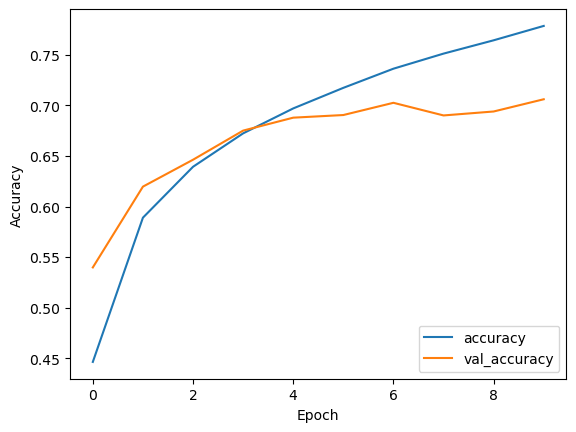

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load and explore the dataset (CIFAR-10 for demonstration)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display the first few images from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
    axes[i].set_title(f"Class: {y_train[i][0]}")

plt.show()

# Analyze the distribution of classes in the training set
class_counts = np.bincount(y_train.flatten())
classes = list(range(len(class_counts)))

plt.bar(classes, class_counts, tick_label=classes)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

# Preprocess the data
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to be between 0 and 1

# Build the deep learning model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network architecture
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for classification

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 128)      

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you have 10 classes for classification (adjust this based on your actual problem)
num_classes = 10

# Define the neural network architecture
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 128)      

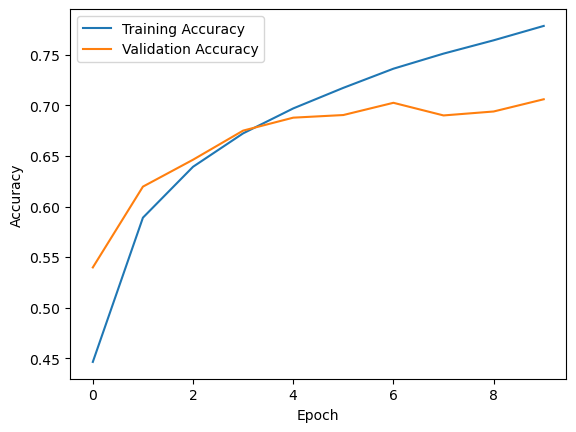

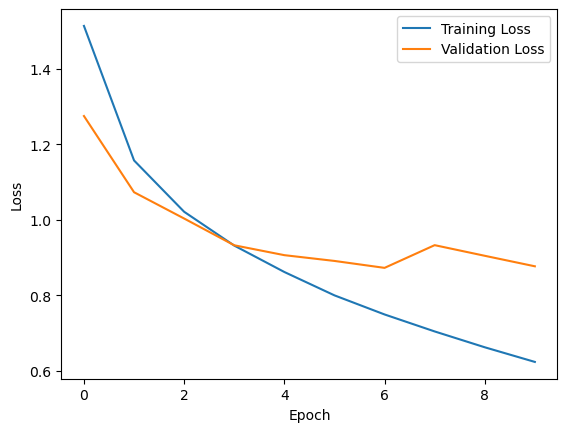

In [5]:
import matplotlib.pyplot as plt

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Placeholder path for the model file
model_file_path = "_happy_jumping_on_beach-40815.jpg"

# Load the trained model
try:
    model = load_model(model_file_path)
except OSError as e:
    print(f"Error loading the model: {e}")
    # Handle the error appropriately, e.g., check the file path

# Rest of the code remains unchanged...

Error loading the model: Unable to open file (file signature not found)


In [8]:
def load_reshape_img(fname):
    img = load_img(fname)
    x = img_to_array(img)/255.
    x = x.reshape((1,) + x.shape)

    return x


def generate_df(partition, attr, num_samples):
    '''
    partition
        0 -> train
        1 -> validation
        2 -> test
    
    '''
    
    df_ = df_par_attr[(df_par_attr['partition'] == partition) 
                           & (df_par_attr[attr] == 0)].sample(int(num_samples/2))
    df_ = pd.concat([df_,
                      df_par_attr[(df_par_attr['partition'] == partition) 
                                  & (df_par_attr[attr] == 1)].sample(int(num_samples/2))])

    # for Train and Validation
    if partition != 2:
        x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_.index])
        x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        y_ = np_utils.to_categorical(df_[attr],2)
    # for Test
    else:
        x_ = []
        y_ = []

        for index, target in df_.iterrows():
            im = cv2.imread(images_folder + index)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis =0)
            x_.append(im)
            y_.append(target[attr])

    return x_, y_

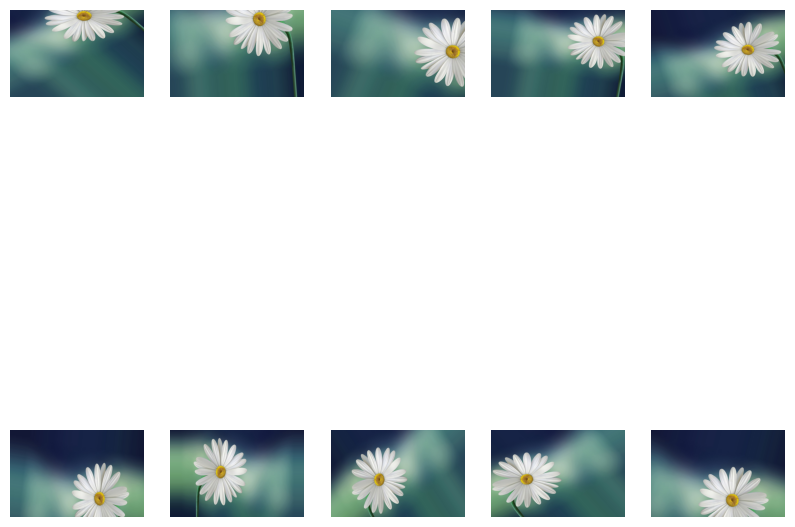

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

# Load the image using load_img
img_path = "marguerite-729510_640.jpg"
img = load_img(img_path)

# Convert the image to a NumPy array
x = img_to_array(img) / 255.
x = x.reshape((1,) + x.shape)

# Define an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Plot 10 augmented images of the loaded image
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    augmented_image = datagen.flow(x, batch_size=1)[0]
    plt.imshow(augmented_image[0])
    plt.axis('off')

plt.show()


In [15]:
#Install TensorFlow Serving
# !pip install tensorflow-serving-api

# Save the model in SavedModel format
model.save("path/to/saved_model")

# Start TensorFlow Serving
# Replace 'model_name' and 'version_number' with appropriate names
!tensorflow_model_server --model_name=model_name --model_base_path=path/to/saved_model --rest_api_port=8501 --model_version=version_number

INFO:tensorflow:Assets written to: path/to/saved_model/assets


INFO:tensorflow:Assets written to: path/to/saved_model/assets


zsh:1: command not found: tensorflow_model_server


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example documentation for model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Q2:Weekend Exercise

In [17]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
df = pd.read_csv('kc_house_data.csv')

In [19]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/var/folders/yy/x4_pfryj48d0xm008vct2nzw0000gn/T/ipykernel_2260/636539046.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axes[0])


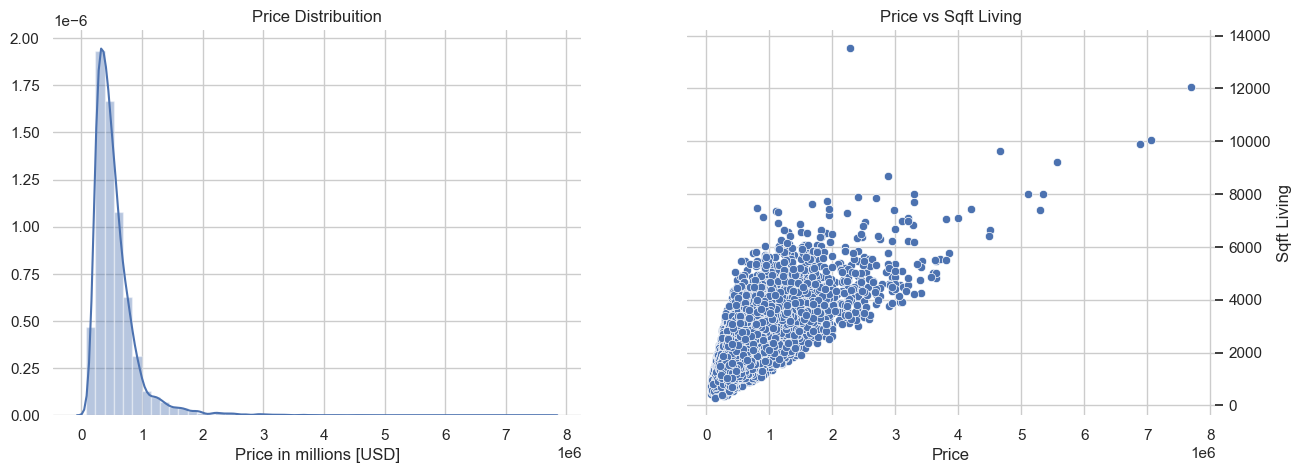

In [27]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

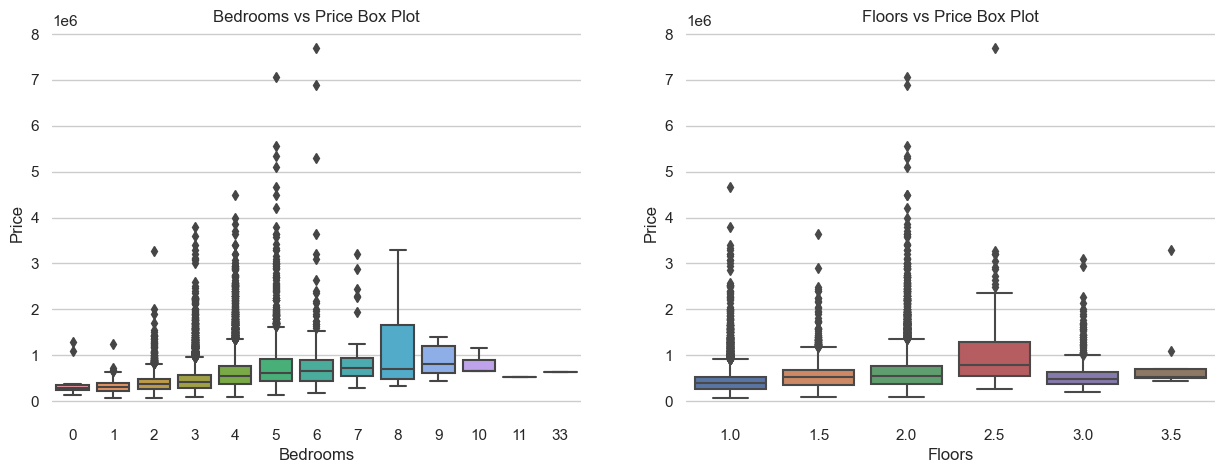

In [28]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

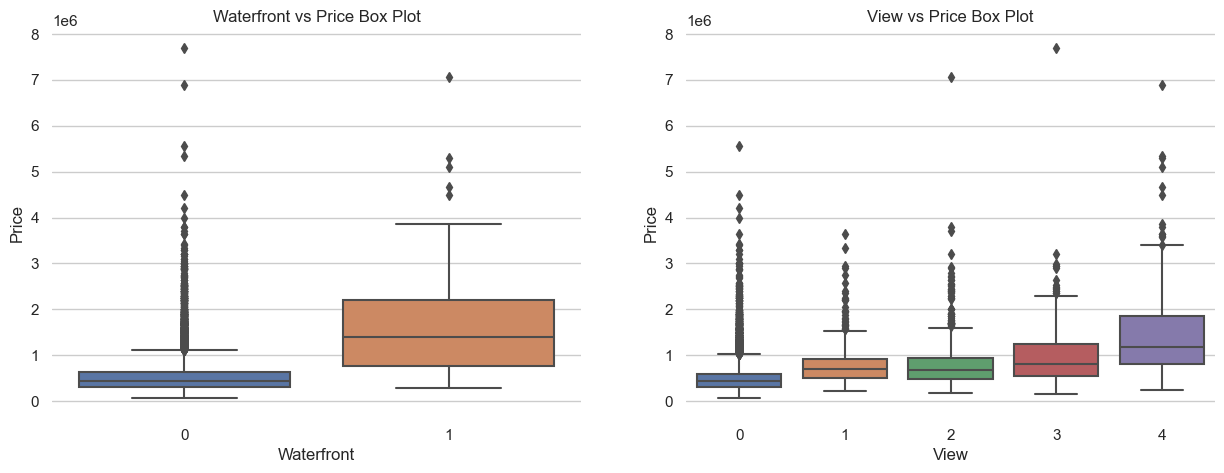

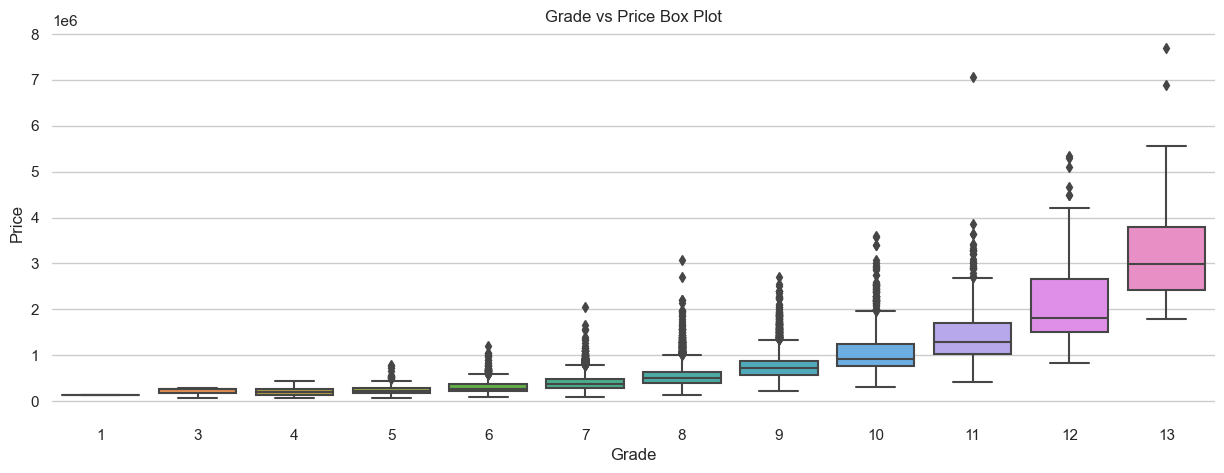

In [29]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')


In [30]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

In [31]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

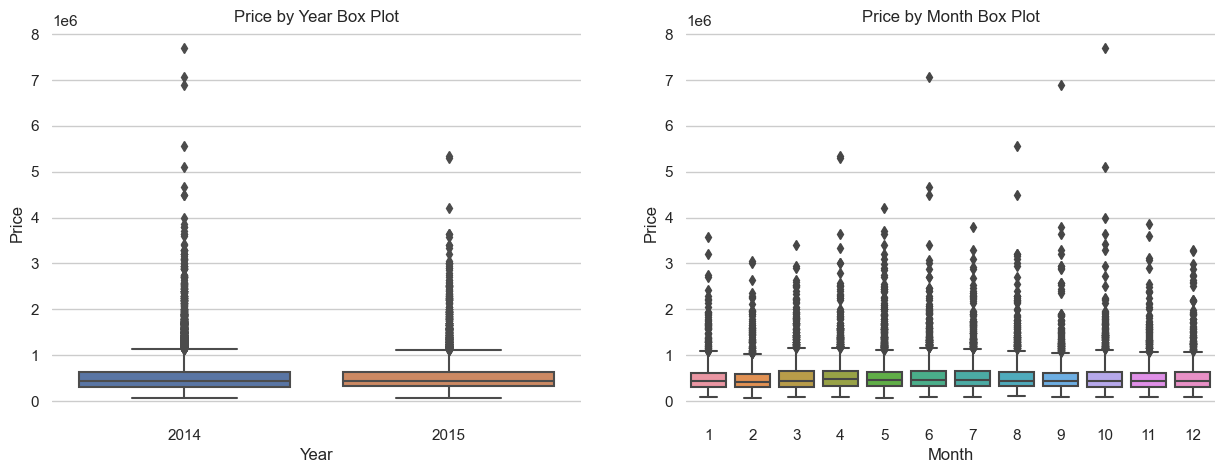

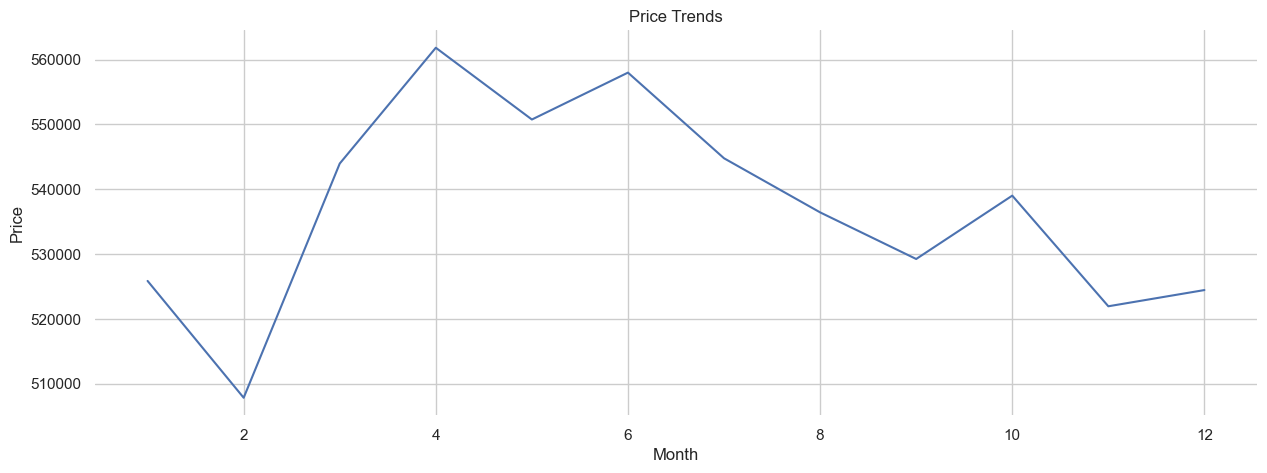

In [32]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

In [33]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


In [35]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [36]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [37]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 423620280320.0000 - val_loss: 432977739776.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 422172917760.0000 - val_loss: 427874156544.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 401332305920.0000 - val_loss: 378715308032.0000
Epoch 4/400
119/119 [==============================] - 0s 999us/step - loss: 301093158912.0000 - val_loss: 222077632512.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 144830496768.0000 - val_loss: 109136347136.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 99124920320.0000 - val_loss: 102757982208.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 96834723840.0000 - val_loss: 101022957568.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 95207530496.0000 - val_loss: 99234824192.0000
Epoch 9/400
119/11

119/119 [==============================] - 0s 1ms/step - loss: 37627924480.0000 - val_loss: 37362688000.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 37469724672.0000 - val_loss: 37017673728.0000
Epoch 70/400
119/119 [==============================] - 0s 997us/step - loss: 37309059072.0000 - val_loss: 36955439104.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 37193158656.0000 - val_loss: 36748697600.0000
Epoch 72/400
119/119 [==============================] - 0s 997us/step - loss: 37072736256.0000 - val_loss: 36611858432.0000
Epoch 73/400
119/119 [==============================] - 0s 995us/step - loss: 36930121728.0000 - val_loss: 36472475648.0000
Epoch 74/400
119/119 [==============================] - 0s 993us/step - loss: 36787351552.0000 - val_loss: 36369833984.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 36649009152.0000 - val_loss: 36195311616.0000
Epoch 76/400
119/119 [=======

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33023408128.0000 - val_loss: 32326555648.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32953794560.0000 - val_loss: 32351965184.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32907132928.0000 - val_loss: 32284403712.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 32909748224.0000 - val_loss: 32233078784.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 32872712192.0000 - val_loss: 32186310656.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32828801024.0000 - val_loss: 32158173184.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 32813373440.0000 - val_loss: 32130185216.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32754137088.0000 - val_loss: 32113135616.0000
Epoch 143/400
11

119/119 [==============================] - 0s 995us/step - loss: 31232598016.0000 - val_loss: 30694842368.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31248842752.0000 - val_loss: 30643843072.0000
Epoch 203/400
119/119 [==============================] - 0s 995us/step - loss: 31225165824.0000 - val_loss: 30650959872.0000
Epoch 204/400
119/119 [==============================] - 0s 999us/step - loss: 31214231552.0000 - val_loss: 30693580800.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31167787008.0000 - val_loss: 30607798272.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31173955584.0000 - val_loss: 30610059264.0000
Epoch 207/400
119/119 [==============================] - 0s 999us/step - loss: 31172249600.0000 - val_loss: 30555719680.0000
Epoch 208/400
119/119 [==============================] - 0s 998us/step - loss: 31126968320.0000 - val_loss: 30767210496.0000
Epoch 209/400
119/11

119/119 [==============================] - 0s 997us/step - loss: 30109540352.0000 - val_loss: 29800933376.0000
Epoch 268/400
119/119 [==============================] - 0s 991us/step - loss: 30060247040.0000 - val_loss: 29712236544.0000
Epoch 269/400
119/119 [==============================] - 0s 996us/step - loss: 30053941248.0000 - val_loss: 29819039744.0000
Epoch 270/400
119/119 [==============================] - 0s 992us/step - loss: 30094620672.0000 - val_loss: 29702516736.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30021744640.0000 - val_loss: 29762011136.0000
Epoch 272/400
119/119 [==============================] - 0s 998us/step - loss: 30012551168.0000 - val_loss: 29658171392.0000
Epoch 273/400
119/119 [==============================] - 0s 995us/step - loss: 29977602048.0000 - val_loss: 29640214528.0000
Epoch 274/400
119/119 [==============================] - 0s 994us/step - loss: 29984481280.0000 - val_loss: 29619073024.0000
Epoch 275/400
11

119/119 [==============================] - 0s 1ms/step - loss: 28903778304.0000 - val_loss: 28890771456.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 28928497664.0000 - val_loss: 28792008704.0000
Epoch 335/400
119/119 [==============================] - 0s 1000us/step - loss: 28899958784.0000 - val_loss: 28806684672.0000
Epoch 336/400
119/119 [==============================] - 0s 1000us/step - loss: 28910551040.0000 - val_loss: 28746790912.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 28816809984.0000 - val_loss: 28753254400.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 28828448768.0000 - val_loss: 28736612352.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 28813193216.0000 - val_loss: 28815732736.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 28818651136.0000 - val_loss: 28706385920.0000
Epoch 341/400
119/119 [=

119/119 [==============================] - 0s 999us/step - loss: 27749687296.0000 - val_loss: 27895941120.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 27728797696.0000 - val_loss: 27866595328.0000


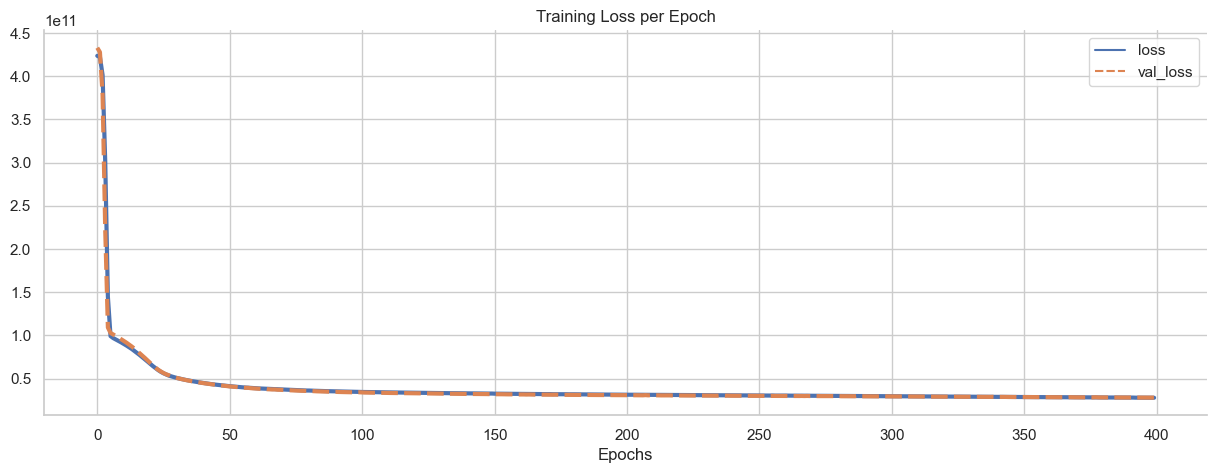

In [38]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [39]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

203/203 [==============================] - 0s 429us/step
MAE:  103024.28707563812
MSE:  27866598595.298264
RMSE:  166932.91645238295
Variance Regression Score:  0.8013703171686134


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


/var/folders/yy/x4_pfryj48d0xm008vct2nzw0000gn/T/ipykernel_2260/2623656612.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

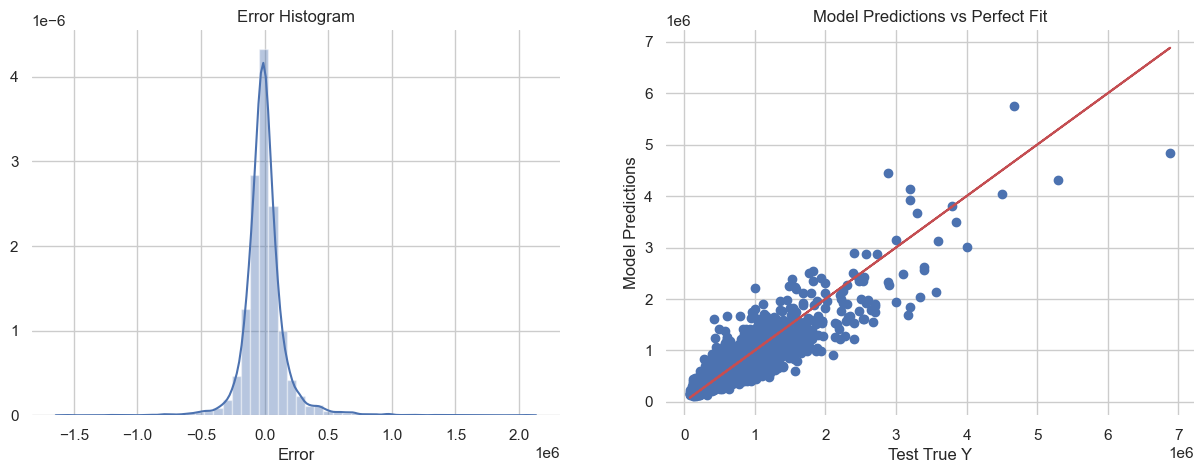

In [40]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [41]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 [==============================] - 0s 12ms/step

Prediction Price: 287272.8

Original Price: 221900.0


/Users/anubhavshroti/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
